In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [40]:
import random
np.random.seed(42)
random.seed(42)


df = pd.read_csv('synthetic_multiclass_dataset.csv')
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values.reshape(-1, 1)   
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


# Step 4: One-Hot Encode Labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_onehot, test_size=0.3, random_state=42)


In [51]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 15
        hiddenLayer2Neurons = 15
        hiddenLayer3Neurons = 15
        outputLayerNeurons = 4
        self.learning_rate = 0.00001

        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_O = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

    def relu(self, x, der=False):
        return (x > 0).astype(float) if der else np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.Z1 = np.dot(X, self.W_H1)
        self.A1 = self.relu(self.Z1)

        self.Z2 = np.dot(self.A1, self.W_H2)
        self.A2 = self.relu(self.Z2)

        self.Z3 = np.dot(self.A2, self.W_H3)
        self.A3 = self.relu(self.Z3)

        self.Z_out = np.dot(self.A3, self.W_O)
        self.output = self.softmax(self.Z_out)
        return self.output

    def train(self, X, y):
        output = self.feedForward(X)

        error = output - y
        dW_O = np.dot(self.A3.T, error)

        dA3 = np.dot(error, self.W_O.T) * self.relu(self.Z3, der=True)
        dW_H3 = np.dot(self.A2.T, dA3)

        dA2 = np.dot(dA3, self.W_H3.T) * self.relu(self.Z2, der=True)
        dW_H2 = np.dot(self.A1.T, dA2)

        dA1 = np.dot(dA2, self.W_H2.T) * self.relu(self.Z1, der=True)
        dW_H1 = np.dot(X.T, dA1)

        self.W_O -= self.learning_rate * dW_O
        self.W_H3 -= self.learning_rate * dW_H3
        self.W_H2 -= self.learning_rate * dW_H2
        self.W_H1 -= self.learning_rate * dW_H1


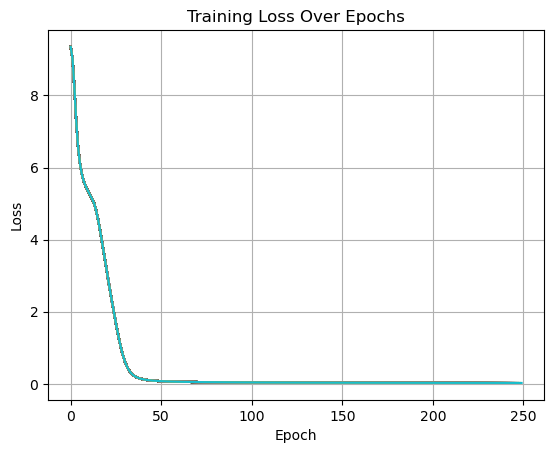

In [52]:
NN = NeuralNetwork()
epochs = 250
losses = []

def categorical_cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / y_true.shape[0]

for epoch in range(epochs):
    NN.train(X_train, y_train)
    y_pred = NN.feedForward(X_train)
    loss = categorical_cross_entropy(y_train, y_pred)
    losses.append(loss)
    plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [53]:
predictions = NN.feedForward(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_classes == true_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



Test Accuracy: 98.33%


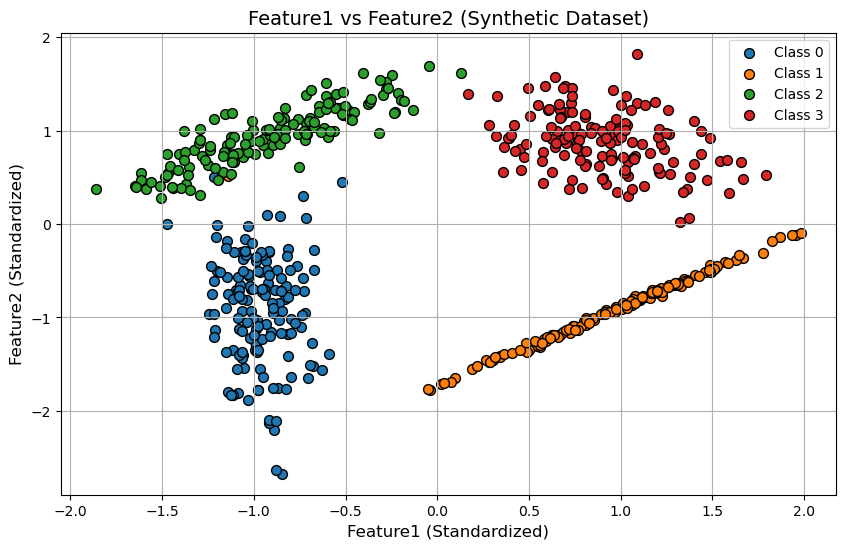

In [48]:

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("synthetic_multiclass_dataset.csv")
X = df[["Feature1", "Feature2"]].values
y = df["Label"].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Create plot DataFrame
plot_df = pd.DataFrame(X_scaled, columns=["Feature1", "Feature2"])
plot_df["Animal"] = y_named   # Keeping column name "Animal" to match your structure
plot_df["Label"] = y_encoded

# Plot
plt.figure(figsize=(10, 6))

for cls in class_list:
    class_points = plot_df[plot_df["Animal"] == cls]
    plt.scatter(
        class_points["Feature1"],
        class_points["Feature2"],
        label=cls,
        s=50,
        edgecolor='k'
    )

plt.title("Feature1 vs Feature2 (Synthetic Dataset)", fontsize=14)
plt.xlabel("Feature1 (Standardized)", fontsize=12)
plt.ylabel("Feature2 (Standardized)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()
